In [1]:
import MMGPD
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt


In [2]:
def Ht_uv(x,t):
    return MMGPD.xGPD("HGAG23", "9", "Ht", "uv", x, t) / x

def Ht_dv(x,t):
    return MMGPD.xGPD("HGAG23", "9", "Ht", "dv", x, t) / x

def Ht_ubar(x,t):
    return MMGPD.xGPD("HGAG23", "9", "Ht", "ubar", x, t) / x

def Ht_dbar(x,t):
    return MMGPD.xGPD("HGAG23", "9", "Ht", "dbar", x, t) / x

def GAintegrand(x,t):
        return ( Ht_uv(x,t) - Ht_dv(x,t) ) + 2*(Ht_ubar(x,t) - 2*Ht_dbar(x,t) )

def GA(t):
    return quad(GAintegrand, 1e-3, 1, args=(t,), epsabs=1e-1)  # epsabs is the absolute error margins of integrations
    

In [3]:
t_values = np.linspace(-5, -0.1, 50)  # 100 points between -5 and -0.1

# Compute the integrals for each value of t
GAT = [GA(t)[0] for t in t_values]

LHAPDF 6.5.4 loading /opt/homebrew/anaconda3/envs/MMGPDs/share/LHAPDF/NNPDFpol11_100/NNPDFpol11_100_0000.dat
NNPDFpol11_100 PDF set, member #0, version 1; LHAPDF ID = 251000
LHAPDF 6.5.4 loading /opt/homebrew/anaconda3/envs/MMGPDs/share/LHAPDF/NNPDFpol11_100/NNPDFpol11_100_0000.dat
NNPDFpol11_100 PDF set, member #0, version 1; LHAPDF ID = 251000
LHAPDF 6.5.4 loading /opt/homebrew/anaconda3/envs/MMGPDs/share/LHAPDF/NNPDFpol11_100/NNPDFpol11_100_0000.dat
NNPDFpol11_100 PDF set, member #0, version 1; LHAPDF ID = 251000
LHAPDF 6.5.4 loading /opt/homebrew/anaconda3/envs/MMGPDs/share/LHAPDF/NNPDFpol11_100/NNPDFpol11_100_0000.dat
NNPDFpol11_100 PDF set, member #0, version 1; LHAPDF ID = 251000
LHAPDF 6.5.4 loading /opt/homebrew/anaconda3/envs/MMGPDs/share/LHAPDF/NNPDFpol11_100/NNPDFpol11_100_0000.dat
NNPDFpol11_100 PDF set, member #0, version 1; LHAPDF ID = 251000
LHAPDF 6.5.4 loading /opt/homebrew/anaconda3/envs/MMGPDs/share/LHAPDF/NNPDFpol11_100/NNPDFpol11_100_0000.dat
NNPDFpol11_100 PDF se

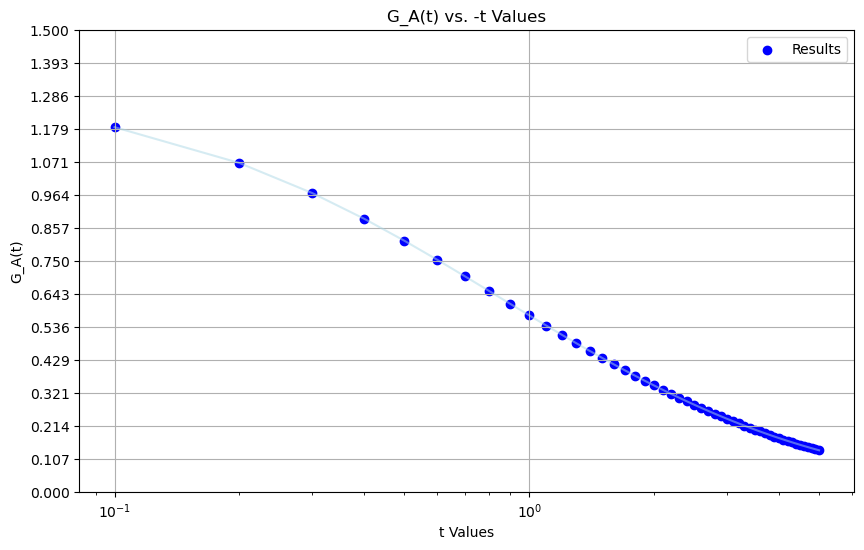

In [4]:

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(-t_values, GAT, color='blue', label='Results')
plt.plot(-t_values, GAT, color='lightblue', alpha=0.5)  # Optional line connecting the points
plt.title('G_A(t) vs. -t Values')
plt.xscale('log')
plt.xlabel('t Values')
plt.yticks(np.linspace(0, 1.5, 15))
plt.ylabel('G_A(t)')
plt.legend()
plt.grid()
plt.show()